In [7]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from utils.utils import plot_decision_boundary

In [8]:
iris_df = load_iris()
X, y = iris_df.data[:, [2, 3]], iris_df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

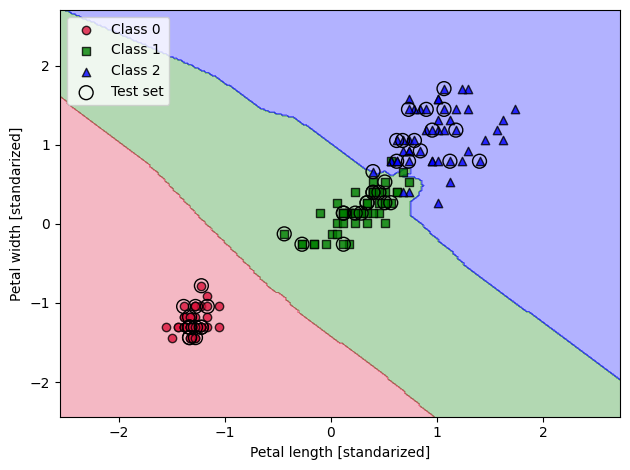

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors=5,
    p=2,
    metric='minkowski'
)
knn.fit(X_train_std, y_train)
plot_decision_boundary(
    X_combined_std,
    y_combined,
    classifier=knn,
    test_idx=range(105,150),
    x_label='Petal length [standarized]',
    y_label='Petal width [standarized]'
)

The right choice of k is crucial to finding a good balance between overfitting and underfitting. We also have to make sure that we choose a distance metric that is appropriate for the features in the dataset. Often, a simple Euclidean distance measure is used for real-value examples, for example, the flowers in our Iris dataset, which have features measured in centimeters. However, if we are using a Euclidean distance measure, it is also important to standardize the data so that each feature contributes equally to the distance. The minkowski distance that we used in the previous code is just a generalization of the Euclidean and Manhattan distance